In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/mtech_fde/Sarvesh_Projects/EX 6/diabetes.csv')

In [4]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Ensure all columns we summarize are numeric (skip non-numeric if any)
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Compute mean and median
mean_series = df[numeric_cols].mean()
median_series = df[numeric_cols].median()

# Compute mode for each column (can be multiple values)
mode_df = df[numeric_cols].mode(dropna=True)

# Build a tidy summary DataFrame with mean, median, and (first) mode
summary = pd.DataFrame({
    'mean': mean_series,
    'median': median_series,
    'mode_first': mode_df.iloc[0] if not mode_df.empty else np.nan
})

# If you want to include all modes (when multiple), join them as strings
def all_modes(col):
    m = df[col].mode(dropna=True)
    return ', '.join(map(str, m.values)) if len(m) > 0 else np.nan

summary['mode_all'] = [all_modes(col) for col in numeric_cols]

summary


,mean,median,mode_first,mode_all
Pregnancies,3.845052,3.0000,1.000,1
Glucose,120.894531,117.0000,99.000,"99, 100"
BloodPressure,69.105469,72.0000,70.000,70
SkinThickness,20.536458,23.0000,0.000,0
Insulin,79.799479,30.5000,0.000,0
BMI,31.992578,32.0000,32.000,32.0
DiabetesPedigreeFunction,0.471876,0.3725,0.254,"0.254, 0.258"
Age,33.240885,29.0000,22.000,22
Outcome,0.348958,0.0000,0.000,0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

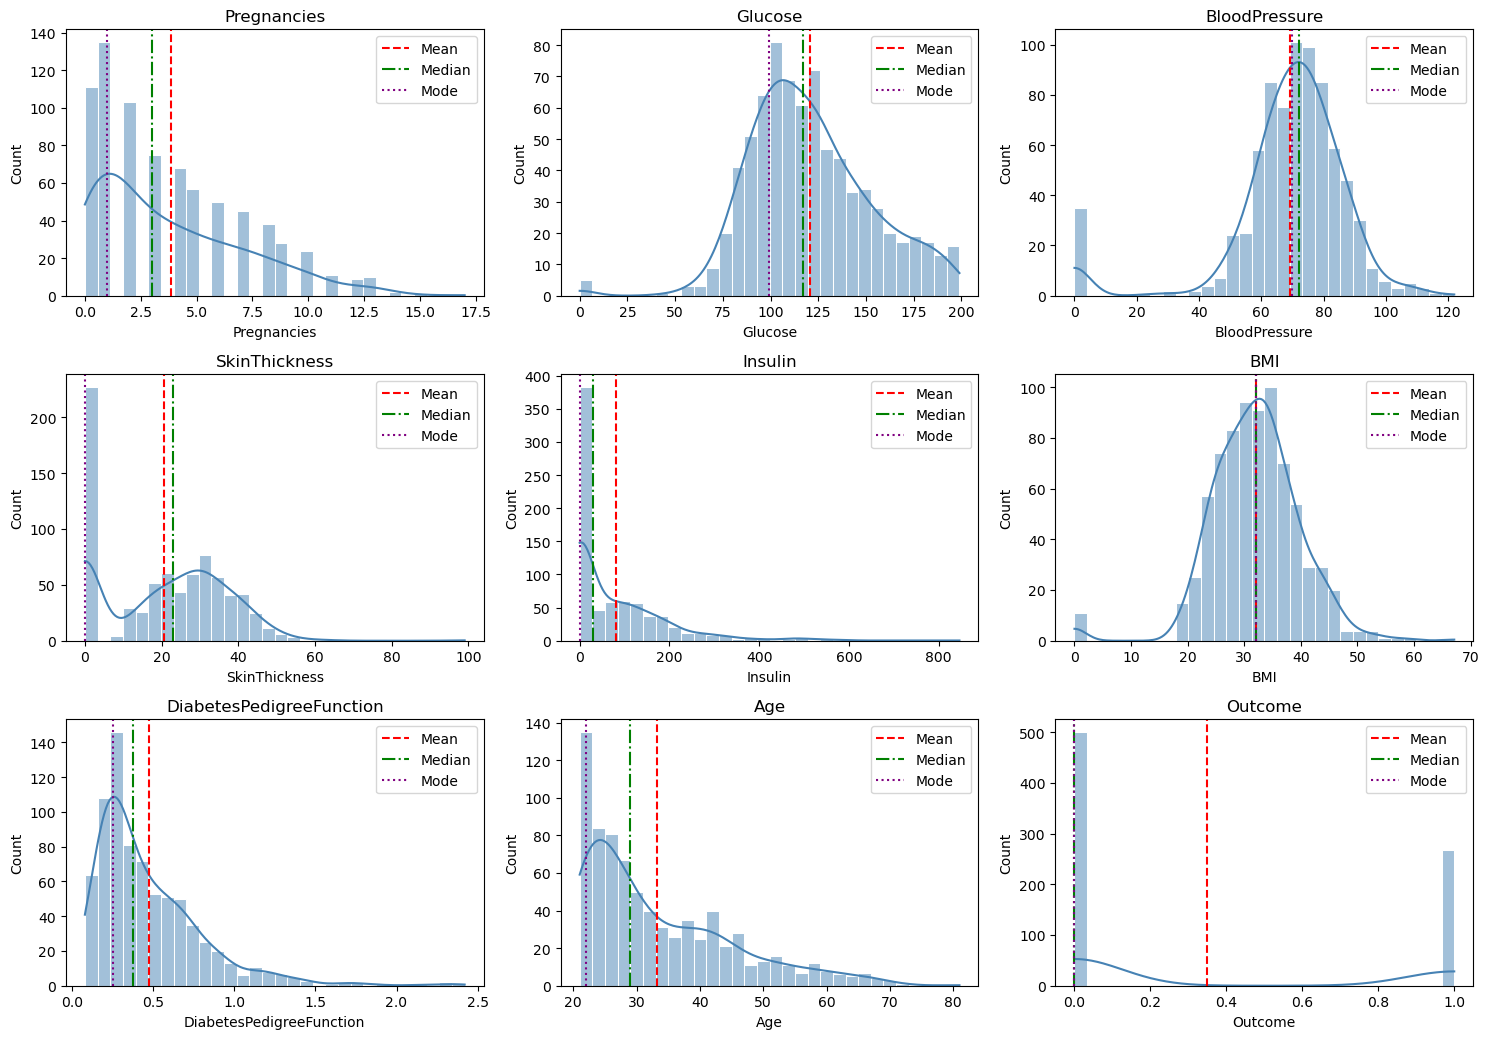

In [7]:
import seaborn as sns

n_cols = 3
n_rows = int(np.ceil(len(numeric_cols)/n_cols))
plt.figure(figsize=(5*n_cols, 3.5*n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    # Histogram + KDE
    sns.histplot(df[col], kde=True, bins=30, color='steelblue', edgecolor='white')
    
    # Compute stats
    mu = df[col].mean()
    med = df[col].median()
    modes = df[col].mode(dropna=True)
    mo = modes.iloc[0] if len(modes) else np.nan
    
    # Add vertical lines for mean, median, mode
    plt.axvline(mu, color='red', linestyle='--', linewidth=1.5, label='Mean')
    plt.axvline(med, color='green', linestyle='-.', linewidth=1.5, label='Median')
    if pd.notna(mo):
        plt.axvline(mo, color='purple', linestyle=':', linewidth=1.5, label='Mode')
    
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()
